In [3]:
import numpy as np
import matplotlib.pyplot as plt 


In [26]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.theta = None

    def __add_intercept(self, x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, x, y):
        if self.fit_intercept:
            x = self.__add_intercept(x)
        self.theta = np.zeros(x.shape[1])
        for i in range(self.num_iter):
            z = np.dot(x, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(x.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            z = np.dot(x, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            if self.verbose and i % 10000 == 0:
                print(f'loss: {loss} \t')

    def predict_prob(self, x):
        if self.fit_intercept:
            x = self.__add_intercept(x)
        return self.__sigmoid(np.dot(x, self.theta))

    def predict(self, x):
        return (self.predict_prob(x) >= 0.5).astype(int)


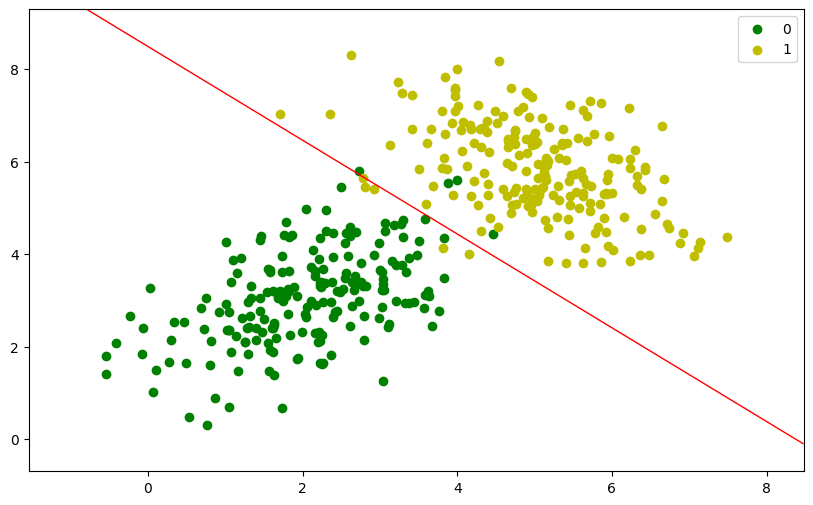

In [31]:

# Example usage:
if __name__ == "__main__":
    # Sample data

    # Generate synthetic data for binary classification
    np.random.seed(0)  # For reproducibility

    # Create two clusters for class 0 and class 1
    mean1 = [2, 3]
    cov1 = [[1, 0.5], [0.5, 1]]
    class0_data = np.random.multivariate_normal(mean1, cov1, 200)

    mean2 = [5, 6]
    cov2 = [[1, -0.5], [-0.5, 1]]
    class1_data = np.random.multivariate_normal(mean2, cov2, 200)

    X = np.vstack((class0_data, class1_data))
    y = np.hstack((np.zeros(200), np.ones(200)))

    # Create a LogisticRegression model and train it
    model = LogisticRegression(lr=0.1, num_iter=300000)
    model.fit(X, y)

    # Visualize the decision boundary
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
    plt.legend()

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red')

    plt.show()